# Forecasting

## Forecasting with the Holt-Winters Method

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


There are 144 data points across 12 years (1949-1960), we will split 75% for training and 25% for testing, so 108 entries for training and rest are testing samples.

## Train Test Split

In [4]:
train_data = df.iloc[:108] #goes up to but not include 108
test_data = df.iloc[108:]

## Fitting the Model

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='add', seasonal='mul', seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [6]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [7]:
test_predictions

1958-01-01    345.597838
1958-02-01    337.457908
1958-03-01    391.276293
1958-04-01    380.636091
1958-05-01    382.071307
1958-06-01    438.514652
1958-07-01    486.142052
1958-08-01    480.826833
1958-09-01    422.403366
1958-10-01    367.229956
1958-11-01    321.244081
1958-12-01    362.208216
1959-01-01    370.509350
1959-02-01    361.637431
1959-03-01    419.145602
1959-04-01    407.587562
1959-05-01    408.965708
1959-06-01    469.202150
1959-07-01    519.965294
1959-08-01    514.087429
1959-09-01    451.455123
1959-10-01    392.343100
1959-11-01    343.087982
1959-12-01    386.698815
1960-01-01    395.420862
1960-02-01    385.816955
1960-03-01    447.014911
1960-04-01    434.539032
1960-05-01    435.860110
1960-06-01    499.889648
1960-07-01    553.788536
1960-08-01    547.348024
1960-09-01    480.506880
1960-10-01    417.456245
1960-11-01    364.931884
1960-12-01    411.189413
Freq: MS, Name: HW Forecast, dtype: float64

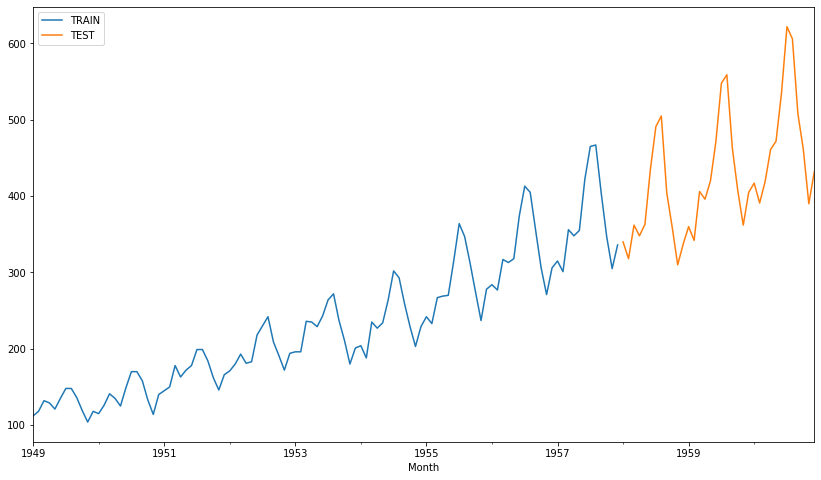

In [8]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(14,8));

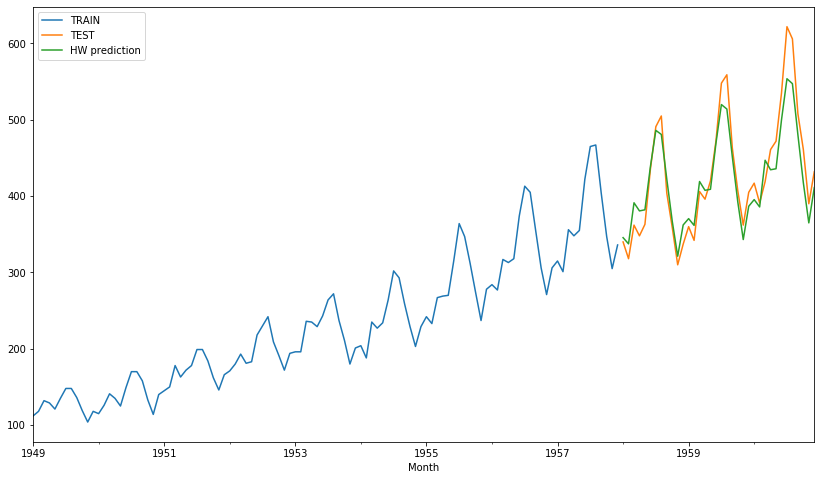

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(14,8))
test_predictions.plot(legend=True, label='HW prediction');

## Evaluating Metrics

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
mean_absolute_error(test_data, test_predictions)

22.305902478217476

In [12]:
mean_squared_error(test_data, test_predictions)

710.6568649728389

In [13]:
np.sqrt(mean_squared_error(test_data, test_predictions))

26.658148190991042

In [14]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


Compared to the mean number of passengers (428.5 thousands of people), 26 is not bad.

## Forecast into Future

In [15]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='add', seasonal='mul', seasonal_periods=12).fit()

In [16]:
forecast_predictions = final_model.forecast(36)

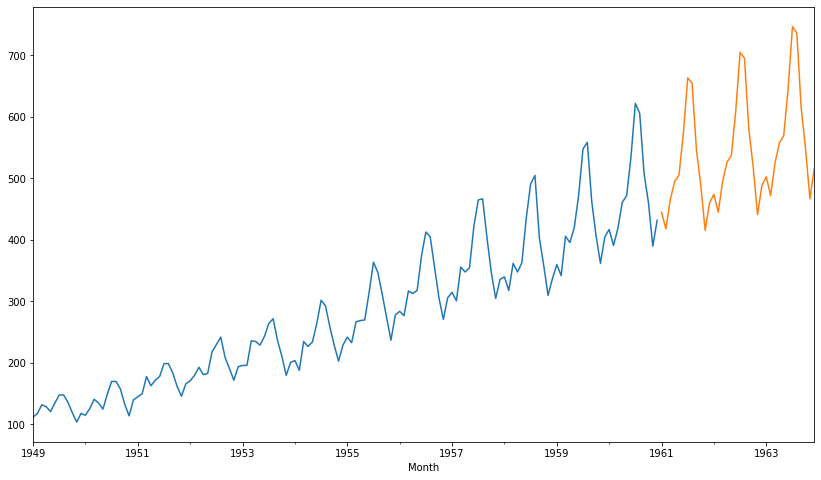

In [17]:
df['Thousands of Passengers'].plot(figsize=(14,8))
forecast_predictions.plot();